In [2]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import bokeh.plotting as bp
#from bokeh.charts import Bar, output_file, show
from bokeh.models.tools import WheelZoomTool, ResetTool, PanTool, BoxZoomTool
%matplotlib inline
bp.output_notebook()
W=590
H=350

Loading BokehJS ...

# Load data 

In [3]:
X=np.load("X.npy")
y=np.load("y.npy")

In [24]:
print X.shape, y.shape

(29946, 23) (29946,)


In [25]:
print X[0]

[20000     1     1    -1    24     2     2    -1    -1    -2    -2  3913
  3102   689     0     0     0     0   689     0     0     0     0]


In [26]:
print np.unique(y)

[-1  1]


# Data Preprocessing

### Standardize the data

In [15]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
X_std=StandardScaler().fit_transform(X)
y_std=y.copy() 

In [23]:
print X_std.shape, y_std.shape

(29946, 23) (29946,)


### Randomly split data into test (10000 samples) and training sets 

In [21]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_std, y_std, test_size=10000, random_state=42)

In [22]:
print X_train.shape, y_train.shape
print X_test.shape, y_test.shape

(19946, 23) (19946,)
(10000, 23) (10000,)


# Analysis 

### Gradient descent function

In [27]:
def gradient_descent(X_train,y_train, X_test, y_test,numIters,stepSize,lam):
    RSS_train=[]
    RSS_test=[]
    
    n=X_train.shape[1] #num variables
    T_train=y_train.size #num samples for training set
    T_test=y_test.size #num samples for test set

    beta = np.random.randn(n) #num of unknowns
    history = [beta] #track beta in iterations
    
    predictions_train = [] #Track predictions in training set
    predictions_test = [] #Track predictions in test set
    
    I = np.eye(n) #Identity matrix

    for i in range(numIters):
        
        pred_train = np.dot(X_train,beta) #dot --> inner prod XB
        predictions_train.append(pred_train)
        pred_test = np.dot(X_test,beta) 
        predictions_test.append(pred_test)
                
        residual_train = y_train - pred_train  #y-XB which is y-xtB
        loss_train = np.sum(residual_train **2)/ T_train  #divide by T to get avg across all samples
        RSS_train.append(loss_train)
        
        residual_test = y_test - pred_test
        loss_test = np.sum(residual_test **2)/ T_test  #divide by T to get avg across all samples        
        RSS_test.append(loss_test)

        term1 = 2*(np.dot(X_train.T, X_train) + lam*I)
        term2 = 2*(np.dot(X_train.T,y_train))
        gradient = (np.dot(term1,beta)) - term2 #-2Xt mult residual
        beta = beta - stepSize * gradient
        
        history.append(beta)
        
    return history, RSS_train, RSS_test

In [28]:
X_train_append = np.c_[np.ones(X_train.shape[0]),X_train] #Add intercepts for each x
X_test_append = np.c_[np.ones(X_test.shape[0]),X_test] #Add intercepts for each x

### Run gradient descent function with different lambda values 

In [29]:
stepSize=1e-6
numIters=5000
lam_list = [1e1, 1, 0.1, 0.01, 0] #lambda
history_list=list()
RSS_train_list=list()
RSS_test_list=list()
for lam in lam_list:
    history, RSS_train, RSS_test = gradient_descent(X_train_append,y_train,X_test_append,y_test, numIters,stepSize,lam)
    history_list.append(history)
    RSS_train_list.append(RSS_train)
    RSS_test_list.append(RSS_test)

### True solution for training data 

In [52]:
I = np.eye(23+1)
lam = 1e1
T_train=y_train.size
term1 = np.linalg.inv(np.dot(X_train_append.T, X_train_append) + np.dot(lam, I))
term2 = np.dot(X_train_append.T,y_train)
true_beta_train = np.dot(term1,term2)
print 'The true beta is: \n',true_beta_train

residual_train_true = y_train - np.dot(X_train_append,true_beta_train)  #y-XB which is y-xtB
loss_train_true = np.sum(residual_train_true **2)/ T_train  #divide by T to get avg across all samples

The true beta is: 
[-0.55842659 -0.0208961  -0.01443328  0.02754276 -0.02161154  0.0233445
  0.2254301   0.05124538  0.02552275  0.01262013  0.01586236 -0.01364356
 -0.09860367  0.01725537  0.01360882 -0.01106473  0.01083695 -0.00078088
 -0.02825997 -0.01726762 -0.00295662 -0.01098348 -0.00908654 -0.00409293]


### Plot loss functions for training data and true solution 

In [53]:
print 'The true loss for training data is: ',loss_train_true

The true loss for training data is:  0.599182036892


In [36]:
TOOLS = [ WheelZoomTool(), ResetTool(), PanTool(), BoxZoomTool()]

fig = bp.figure(width=W, height=H,
               title='Loss functions for training data and true solution',
               tools=TOOLS)
s1 = fig.line(range(numIters),RSS_train, color='navy', line_width=3, legend="Training data") 
s2 = fig.line(range(numIters),loss_train_true, color='green', line_width=3, legend="True solution") 

fig.xaxis.axis_label='Iteration'
fig.yaxis.axis_label='RSS'
fig.title.text_font_size='14pt'
bp.show(fig)

#### The loss calculated using gradient descent becomes similar to the loss calculated using the true solution once the number of iterations increases.

### Plot training data loss functions for different lambda

In [37]:
TOOLS = [ WheelZoomTool(), ResetTool(), PanTool(), BoxZoomTool()]

fig = bp.figure(width=W, height=H,
               title='Loss functions for training data for different lambda',
               tools=TOOLS)
s1 = fig.line(range(numIters),RSS_train_list[0], color='navy', line_width=3, legend="lambda=10")
s2 = fig.line(range(numIters),RSS_train_list[1], color='cyan', line_width=3, legend="lambda=1")
s3 = fig.line(range(numIters),RSS_train_list[2], color='yellow', line_width=3, legend="lambda=0.1")
s4 = fig.line(range(numIters),RSS_train_list[3], color='green', line_width=3, legend="lambda=0.01")
s5 = fig.line(range(numIters),RSS_train_list[4], color='magenta', line_width=3, legend="lambda=0.0")

fig.xaxis.axis_label='Iteration'
fig.yaxis.axis_label='RSS'
fig.title.text_font_size='14pt'
bp.show(fig)

#### The loss value decreases as the number of iterations increase.

### True solution for test data 

In [38]:
T_test=y_test.size
pred_test = np.dot(X_test_append,true_beta_train) 
residual_test_true = y_test - pred_test  #y-XB which is y-xtB
loss_test_true = np.sum(residual_test_true **2)/ T_test  #divide by T to get avg across all samples

### Plot loss functions for test data and true solution 

In [39]:
TOOLS = [ WheelZoomTool(), ResetTool(), PanTool(), BoxZoomTool()]

fig = bp.figure(width=W, height=H,
               title='Loss functions for test data and true solution',
               tools=TOOLS)
s1 = fig.line(range(numIters),RSS_test, color='navy', line_width=3, legend="Test data") 
s2 = fig.line(range(numIters),loss_test_true, color='green', line_width=3, legend="True solution") 

fig.xaxis.axis_label='Iteration'
fig.yaxis.axis_label='RSS'
fig.title.text_font_size='14pt'
bp.show(fig)

#### The loss calculated using gradient descent becomes similar to the loss calculated using the true solution once the number of iterations increases.

### Plot test data loss functions for different lambda

In [40]:
TOOLS = [ WheelZoomTool(), ResetTool(), PanTool(), BoxZoomTool()]

fig = bp.figure(width=W, height=H,
               title='Loss functions for test data for different lambda',
               tools=TOOLS)
s1 = fig.line(range(numIters),RSS_test_list[0], color='navy', line_width=3, legend="lambda=10")
s2 = fig.line(range(numIters),RSS_test_list[1], color='cyan', line_width=3, legend="lambda=1")
s3 = fig.line(range(numIters),RSS_test_list[2], color='red', line_width=3, legend="lambda=0.1")
s4 = fig.line(range(numIters),RSS_test_list[3], color='green', line_width=3, legend="lambda=0.01")
s5 = fig.line(range(numIters),RSS_test_list[4], color='magenta', line_width=3, legend="lambda=0")

fig.xaxis.axis_label='Iteration'
fig.yaxis.axis_label='RSS'
fig.title.text_font_size='14pt'
bp.show(fig)

#### The loss value decreases as the number of iterations increase.

### Beta history plot

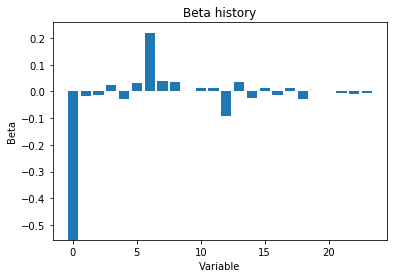

In [115]:
s1 = plt.bar(range(24),history[-1])
plt.xlabel('Variable')
plt.ylabel('Beta')
plt.title("Beta history")

### Lambda vs accuracy

In [48]:
acc=list()
for i in range(5):
    acc.append(RSS_test_list[i][4999])
    
print acc

[0.61392875214158427, 0.61396573512710673, 0.61396492581237561, 0.61391234135750816, 0.61392928315753548]


In [50]:
TOOLS = [ WheelZoomTool(), ResetTool(), PanTool(), BoxZoomTool()]

fig = bp.figure(width=W, height=H,
               title='Lambda vs Accuracy',
               tools=TOOLS)
s1 = fig.line(lam_list,acc, color='navy', line_width=3)
s2 = fig.circle(lam_list,acc, color='orange', size=9)

fig.xaxis.axis_label='Lambda'
fig.yaxis.axis_label='Accuracy'
fig.y_range.end=0.65
fig.y_range.start=0.6


fig.title.text_font_size='14pt'
bp.show(fig)

#### As seen from the above plot, the accuracy has not varied much for the different values of lambda chosen.